# Logistic Regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.enable_eager_execution()
tf.__version__

/home/ssojux2/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ssojux2/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ssojux2/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ssojux2/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

'1.14.0'

## Make a dataset for Logistic Regression

### Logistic Regression을 위한 Dataset을 임의로 만들어 봅시다.

* 2가지 위치에 몰려있는 데이터
* 테스트를 위한 빨간색 데이터

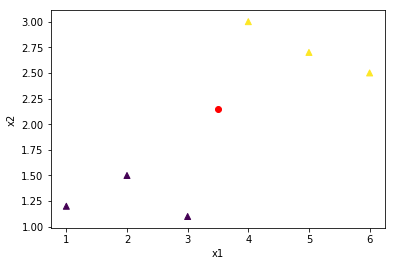

In [2]:
x_train = [[1., 1.2],
          [2., 1.5],
          [3., 1.1],
          [4., 3.],
          [5., 2.7],
          [6., 2.5]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[3.5,2.15]]
y_test = [[1.]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## tf.data.Dataset
* 데이터를 관리해주기위한 tf function
* 각 데이터의 필요 기능들을 지원해준다.
* 데이터셋 크기가 클 경우에 메모리에 나눠올리는 기능을 지원

In [3]:
dataset = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).batch(len(x_train))

W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

print(W, b)

<tf.Variable 'weight:0' shape=(2, 1) dtype=float32, numpy=
array([[1.9476095 ],
       [0.11096874]], dtype=float32)> <tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([-1.0210441], dtype=float32)>


## Sigmoid 함수를 가설로 선언합니다
* Sigmoid는 아래 그래프와 같이 0과 1의 값만을 리턴합니다 tf.sigmoid(tf.matmul(X, W) + b)와 같습니다

## $$
\begin{align}
sigmoid(x) & = \frac{1}{1+e^{-x}}  \\\\\
\end{align}
$$

![sigmoid](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

In [4]:
def logistic_regression(features):
    hypothesis  = tf.div(1., 1. + tf.exp(-(tf.matmul(features, W) + b)))
    return hypothesis

print(logistic_regression(x_train))

W0828 09:23:14.367474 139814266566464 deprecation.py:323] From <ipython-input-4-47df1c591a10>:2: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


tf.Tensor(
[[0.7426385 ]
 [0.9543762 ]
 [0.9929234 ]
 [0.9991774 ]
 [0.99987864]
 [0.99998236]], shape=(6, 1), dtype=float32)


## 가설을 검증할 Cost 함수를 정의합니다
$$
\begin{align}
cost(h(x),y) & = −log(h(x))  &  if :  &  y=1 \\\\\
cost(h(x),y) & = -log(1−h(x))  &  if :  &  y=0
\end{align}
$$

### 두 식을 한번에 쓰게되면,

$$
\begin{align}
cost(h(x),y) & = −y log(h(x))−(1−y)log(1−h(x))
\end{align}
$$

In [5]:
def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.log(hypothesis) + \
                           (1 - labels) * tf.log(1 - hypothesis))
    return cost

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [6]:
epochs = 5000

for step in range(epochs):
  for features, labels in dataset:
    with tf.GradientTape() as tape:
      loss_value = loss_fn(logistic_regression(features),labels)
      grads = tape.gradient(loss_value, [W,b])
      optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
      if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),labels)))

Iter: 0, Loss: 1.5647
Iter: 100, Loss: 1.4268
Iter: 200, Loss: 1.2944
Iter: 300, Loss: 1.1684
Iter: 400, Loss: 1.0496
Iter: 500, Loss: 0.9392
Iter: 600, Loss: 0.8382
Iter: 700, Loss: 0.7477
Iter: 800, Loss: 0.6688
Iter: 900, Loss: 0.6022
Iter: 1000, Loss: 0.5481
Iter: 1100, Loss: 0.5060
Iter: 1200, Loss: 0.4748
Iter: 1300, Loss: 0.4527
Iter: 1400, Loss: 0.4375
Iter: 1500, Loss: 0.4275
Iter: 1600, Loss: 0.4208
Iter: 1700, Loss: 0.4164
Iter: 1800, Loss: 0.4133
Iter: 1900, Loss: 0.4110
Iter: 2000, Loss: 0.4092
Iter: 2100, Loss: 0.4077
Iter: 2200, Loss: 0.4063
Iter: 2300, Loss: 0.4050
Iter: 2400, Loss: 0.4038
Iter: 2500, Loss: 0.4026
Iter: 2600, Loss: 0.4014
Iter: 2700, Loss: 0.4002
Iter: 2800, Loss: 0.3991
Iter: 2900, Loss: 0.3979
Iter: 3000, Loss: 0.3968
Iter: 3100, Loss: 0.3956
Iter: 3200, Loss: 0.3945
Iter: 3300, Loss: 0.3934
Iter: 3400, Loss: 0.3922
Iter: 3500, Loss: 0.3911
Iter: 3600, Loss: 0.3900
Iter: 3700, Loss: 0.3889
Iter: 3800, Loss: 0.3878
Iter: 3900, Loss: 0.3867
Iter: 4000, 

In [7]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

In [8]:
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Testset Accuracy: 1.0000
